In [1]:
from sklearn import svm
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
arr =[]
for i in range(784):
  arr.append(i)
df_inp = pd.read_csv("/content/drive/MyDrive/train.csv", header=None, usecols =arr)

In [4]:
arr_t = [784]
df_labels = pd.read_csv("/content/drive/MyDrive/train.csv", header=None, usecols=arr_t)

In [5]:
np_X = df_inp.to_numpy()
np_Y = df_labels.to_numpy()
np_X /= 255

In [6]:
print(np.shape(np_X))
print(np.shape(np_Y))

(22500, 784)
(22500, 1)


In [7]:
print(type(np_Y[0].item()))
np_Y = np_Y.astype(int)
print(type(np_Y[0].item()))

<class 'float'>
<class 'int'>


In [8]:
y = np.ravel(np_Y)
clf_fl = svm.SVC(decision_function_shape='ovo',gamma=0.05)
clf_fl.fit(np_X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
# Test Set accuracy
df_inp_test = pd.read_csv("/content/drive/MyDrive/test.csv", header=None, usecols =arr)
df_labels_test = pd.read_csv("/content/drive/MyDrive/test.csv", header=None, usecols=arr_t)

In [9]:
np_X_test = df_inp_test.to_numpy()
np_Y_test = df_labels_test.to_numpy()
print(np_X_test)
print(np_Y_test)
np_X_test /= 255

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.]
 [2.]
 [1.]
 ...
 [0.]
 [3.]
 [2.]]


In [10]:
print(np.shape(np_X_test))

(5000, 784)


In [12]:
correct =0
for o in range(5000):
  pred_arr = np.zeros((1,784))
  pred_arr[0]= np_X_test[o]
  pred = clf_fl.predict(pred_arr)
  #print(pred)
  #print(np_Y_test[o])
  #print('done')
  if pred == int(np_Y_test[o].item()):
    correct+=1
print(correct/5000)

0.8808


In [13]:
print(correct)

4404


In [14]:
# Val. Set accuracy
df_inp_val = pd.read_csv("/content/drive/MyDrive/val.csv", header=None, usecols =arr)
df_labels_val = pd.read_csv("/content/drive/MyDrive/val.csv", header=None, usecols=arr_t)
np_X_val = df_inp_val.to_numpy()
np_Y_val = df_labels_val.to_numpy()
np_X_val /= 255

In [15]:
conf_mat = np.zeros((10,10))
print(np.shape(conf_mat))

(10, 10)


In [16]:
op = np.shape(np_Y_val)[0]
correct =0
for o in range(op):
  pred_arr = np.zeros((1,784))
  pred_arr[0]= np_X_val[o]
  pred = clf_fl.predict(pred_arr)
  #print(pred)
  #print(np_Y_test[o])
  #print('done')
  #print(np.shape(conf_mat))
  #print(pred)
  #print(int(np_Y_val[o].item()))
  conf_mat[pred.item()][int(np_Y_val[o].item())]+=1
  if pred == int(np_Y_val[o].item()):
    correct+=1
print(correct/op)

0.8792


In [17]:
print(conf_mat)

[[212.   0.   5.   6.   1.   0.  34.   0.   0.   0.]
 [  0. 237.   0.   0.   1.   0.   0.   0.   0.   0.]
 [  1.   3. 206.   0.  24.   0.  28.   0.   1.   0.]
 [  8.   7.   3. 228.   8.   1.   3.   0.   1.   0.]
 [  0.   0.  18.   6. 200.   0.  19.   0.   1.   0.]
 [  0.   0.   0.   0.   0. 241.   0.   8.   0.   6.]
 [ 26.   2.  13.   9.  15.   0. 165.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   2.   0. 230.   2.   8.]
 [  3.   1.   5.   1.   1.   1.   1.   1. 244.   1.]
 [  0.   0.   0.   0.   0.   5.   0.  11.   0. 235.]]


In [11]:
# 5 fold Cross validation
def kfolddiv(npx,npy,xdim,ydim,k):
  m = np.shape(npy)[0]
  fold_size= int((m/k))
  x = np.zeros((k,fold_size,xdim))
  y = np.zeros((k,fold_size,ydim))
  o=0
  for i in range(k):
    xt = np.zeros((fold_size,xdim))
    yt= np.zeros((fold_size,ydim))
    for j in range(fold_size):
      xt[j]= npx[o]
      yt[j]=npy[o]
      o+=1
    x[i]=xt
    y[i]=yt
  return x,y

In [12]:
x_dat,y_dat = kfolddiv(np_X,np_Y,784,1,5)

In [13]:
def acc(corr,clf,npx,npy):
  op = np.shape(npy)[0]
  for o in range(op):
    pred_arr = np.zeros((1,784))
    pred_arr[0]= npx[o]
    pred = clf.predict(pred_arr)
    if pred == int(npy[o].item()):
      corr+=1
  return (corr/op)

In [14]:
# getting average accuracies
def cross(see,xdat,ydat,xdim,ydim,npxt,npyt,k):
  accu = 0.0
  testaccu=0.0
  for i in range(k):
    xtrain = np.zeros((1,xdim))
    ytrain = np.zeros((1,ydim))
    xtest = np.zeros((1,xdim))
    ytest = np.zeros((1,ydim))
    for j in range(k):
      if j != i:
        xtrain = np.concatenate((xtrain,xdat[j]),axis=0)
        ytrain = np.concatenate((ytrain,ydat[j]),axis=0)
      else:
        xtest = xdat[j]
        ytest = ydat[j]
    xtrain = np.delete(xtrain,0,0)
    ytrain = np.delete(ytrain,0,0)
    #print(xtrain)
    #print(ytrain)
    #print(np.shape(xtrain))
    #print(np.shape(ytrain))
    y = np.ravel(ytrain)
    clf = svm.SVC(decision_function_shape='ovo',gamma=0.05,C=see)
    clf.fit(xtrain,y)
    accu += acc(0,clf,xtest,ytest)
    testaccu += acc(0,clf,npxt,npyt)
    #print(accu)
    #print(testaccu)
  accu /= 5.0
  testaccu /= 5.0
  return accu,testaccu

In [19]:
c_arr = [0.00001,0.001,1.0,5.0,10.0]
np_cross = np.zeros(5)
np_test = np.zeros(5)
for j in range(len(c_arr)):
  print(j)
  np_cross[j],np_test[j]= cross(c_arr[j],x_dat,y_dat,784,1,np_X_test,np_Y_test,5)
  print(j)


0
0
1
1
2
2
3
3
4
4


In [20]:
print(np_cross)
print(np_test)

[0.09466667 0.09466667 0.87853333 0.88324444 0.88324444]
[0.1    0.1    0.8744 0.8788 0.878 ]


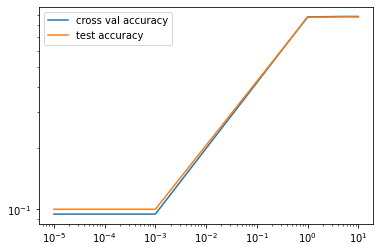

In [28]:
plt.plot(c_arr,np_cross,label="cross val accuracy")
plt.plot(c_arr,np_test,label="test accuracy")
plt.xscale("log")
plt.yscale("log")
plt.legend()